<a href="https://colab.research.google.com/github/D-DePablos/WEW/blob/master/Stage_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 4 : Image processing

In science, a large part of data comes in the form of images. It is here where image processing plays a big role!

*   Getting images into Python
*   Playing with image properties
*   Exercise previous knowledge on some pictures



## Downloading and displaying an Image

The first step to working with images in Python is to get an image ready. We will be using a picture of what is known as "coronal loops" as an example image, but any image URL will work in this section.

In [4]:
import urllib.request


url = 'https://scied.ucar.edu/sites/default/files/images/large_image_for_image_content/coronal_loops_trace_6nov1999_720x500.jpg'

urllib.request.urlretrieve(url, "image.jpg")

('image.jpg', <http.client.HTTPMessage at 0x7f5e0c821a90>)

Once we have downloaded the image locally (saved as image.jpg), we can have a look at what we have. Check that everything looks fine!

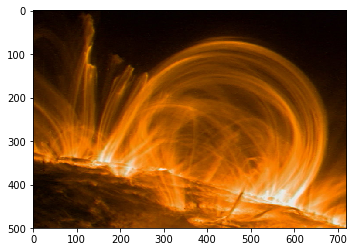

In [6]:
import matplotlib.pyplot as plt

im_loop = plt.imread("image.jpg")

plt.imshow(im_loop)
plt.show()

##The true nature of Images

As you may have expected (perhaps not?), images are no more than arrays of numbers that give information about position, colour and saturation of each of the pixels, for each of Red, Green and Blue.

This is why the image we just plotted has numbered axes!


So this is what a part of the Sun looks like to Python...

In [7]:
print(f' The image is just another array! : {type(im_loop)}')

image_dim = im_loop.shape
print(f'And this is what python sees as the dimensions for the image :{image_dim}')
print(f'\n That is, {image_dim[0]} pixels tall, {image_dim[1]} pixels wide, and in {image_dim[2]} (R,G,B) colours')

 The image is just another array! : <class 'numpy.ndarray'>
And this is what python sees as the dimensions for the image :(500, 720, 3)

 That is, 500 pixels tall, 720 pixels wide, and in 3 (R,G,B) colours


**This is very powerful, as it allows us to use images as if they were numerical arrays!**

We can crop the image, rotate it, or zoom into a part of it with ease!

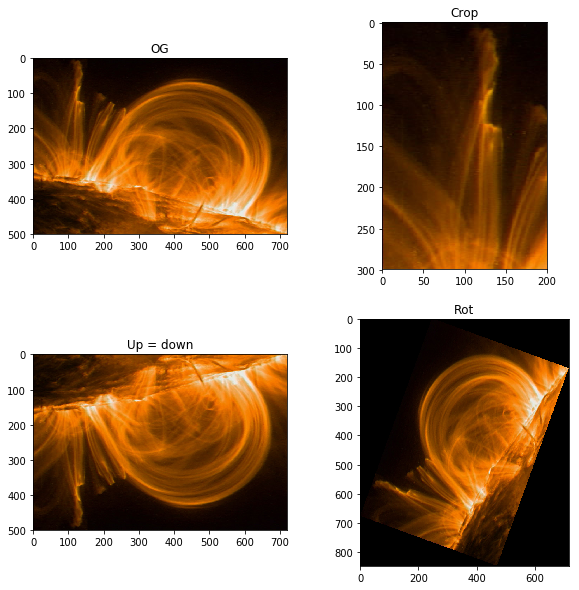

In [8]:
import numpy as np
from scipy import ndimage


im_loop = plt.imread("image.jpg")


fig = plt.figure(figsize = (10,10))

# Original image
fig.add_subplot(2,2,1)
plt.imshow(im_loop)
plt.title('OG')

# Cropped
fig.add_subplot(2,2,2)
im_crop = im_loop[0:300, 0:200, :]
plt.imshow(im_crop)
plt.title('Crop')

# Flipped upside down
fig.add_subplot(2,2,3)
im_flip = np.flipud(im_loop)
plt.imshow(im_flip)
plt.title('Up = down')

# Rotated 70 degrees
fig.add_subplot(2,2,4)
im_rot = ndimage.rotate(im_loop, 70)
plt.imshow(im_rot)
plt.title('Rot')

plt.show()

So the only remaining pixels in the region 200 < Y < 400 and 30 < X < 400 are red or fully black!

## Make your own image here

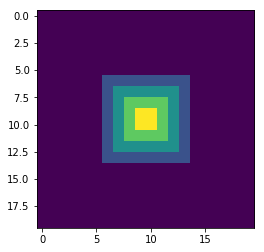

In [9]:
# Create an array of zeroes, set some values and blur them out:

im = np.zeros((20, 20))  # Dimensions of the full array 
im[6:-6, 6:-6] = 1  # Pick a square in the middle and draw in it

im = ndimage.distance_transform_bf(im)  # Then create layered change

# Show our great creation
plt.imshow(im)
plt.show()

###And we can now play with the Image:


*   Adding a colorbar and changing the colormap
*   Creating noise 
*   Blurring and sharpening the image

#### Adding a colorbar and changing the colormap

Changing the colormap allows for easier (or harder!) ways to visualize our data. Rainbow colourmaps may look great, but they are not so good at conveying information! (Even with a colorbar on the side).

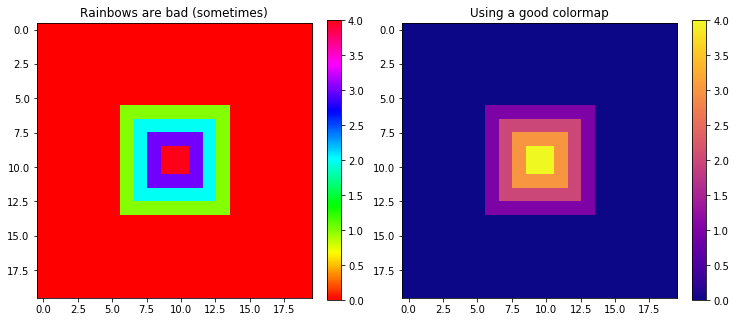

In [10]:
fig = plt.figure(figsize = (12,10))

fig.add_subplot(1,2,1)
plt.imshow(im, cmap = plt.cm.hsv)
plt.title('Rainbows are bad (sometimes)')
plt.colorbar(fraction = 0.046)


fig.add_subplot(1,2,2)
plt.imshow(im, cmap = plt.cm.plasma)
plt.title('Using a good colormap')
plt.colorbar(fraction = 0.046)

plt.show()


For a full list of colormaps, do check https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html, where they explain the optimal usage for colormaps!

It is generally agreed upon that perceptually uniform, sequential colormaps are best! i.e plasma, as chosen in the right image.

#### Creating noise

Now that we know to choose a good colourmap, we can **make our image seem blurry by randomly modifying pixel values**

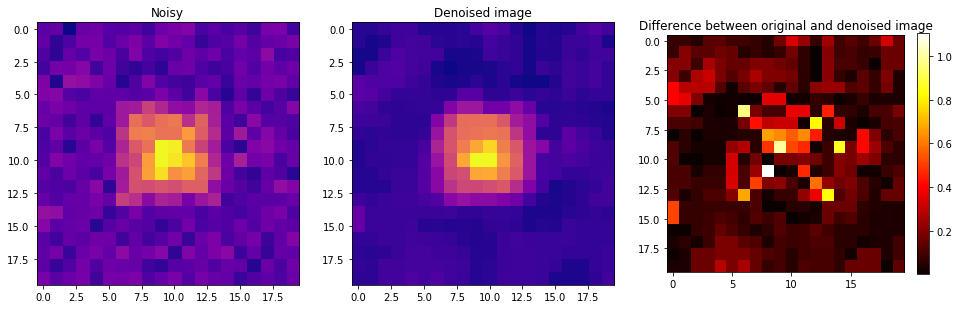

In [11]:
# We first make a noisy image by +/- 30% of the pixel value
im_noise = im + 0.3 * np.random.randn(*im.shape) 

# We can then smooth our noisy image to denoise it
im_med = ndimage.median_filter(im_noise, 3)

fig = plt.figure(figsize = (16,5))

fig.add_subplot(1,3,1)
plt.imshow(im_noise, cmap = plt.cm.plasma)
plt.title('Noisy')



fig.add_subplot(1,3,2)
plt.imshow(im_med, cmap = plt.cm.plasma)
plt.title('Denoised image')



fig.add_subplot(1,3,3)
plt.imshow(np.abs(im - im_med), cmap=plt.cm.hot , interpolation='nearest')
plt.title('Difference between original and denoised image')
plt.colorbar(fraction = 0.046)


plt.show()

Which can be used to deep-fry some previously nice pictures.

#### Blurring and sharpening an image

These two techniques are exact opposites from each other, which is not straight-forward. Let's have a look at an implementation on a random image, say, a racoon.

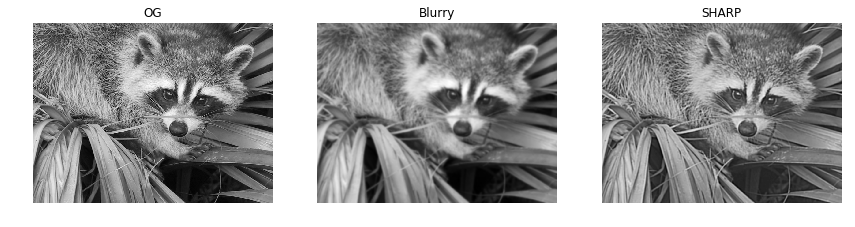

In [44]:
from scipy import misc
import cv2


# Load in the picture from the miscellaneous module
f = misc.face(gray=True).astype(float)  # Original picture : OG

# Create a blurred picture: for each of the pixels, change value slightly
blurred_f = ndimage.gaussian_filter(f, 3)  # Blurry


# We can then sharpen the image using the filter: SHARP
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)


plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(f, cmap=plt.cm.gray)
plt.title('OG')
plt.axis('off')
plt.subplot(132)
plt.imshow(blurred_f, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Blurry')
plt.subplot(133)
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')
plt.title('SHARP')

plt.tight_layout()
plt.show()

## Finding edges inside image

The sobel filter is very good at finding edges for any given shape

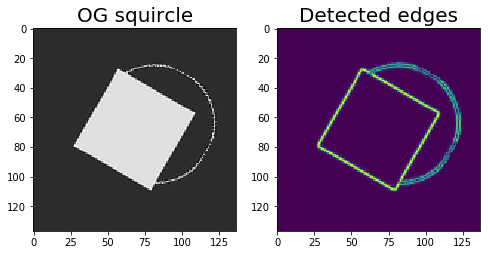

In [13]:
im = np.zeros((100, 100))  # Dimensions of the full array 
im[20:-20, 20:-20] = 1  # Pick a square in the middle and draw in it
cv2.circle(im, (60,60), 40, 1)  # Draw a circle


im = ndimage.rotate(im, 60, mode='constant')
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(8, 5))
plt.subplot(121)
plt.imshow(im, cmap=plt.cm.gray)
plt.title('OG squircle', fontsize=20)
plt.subplot(122)
plt.imshow(sob)
plt.title('Detected edges', fontsize=20)
im += 2*np.random.random(im.shape)

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.show()

## Exercise 4

Now you are ready to take on this challenge. You need to save the MSSL logo with the code below, and then get it as close as you can to the following image: https://imgur.com/a/GZru1yJ

In [14]:
url = 'https://www.ukspacefacilities.stfc.ac.uk/Gallery/MSSL_Logo_360x222.jpg'
urllib.request.urlretrieve(url, "mssl_logo.jpg")



('mssl_logo.jpg', <http.client.HTTPMessage at 0x7f5e07acce80>)

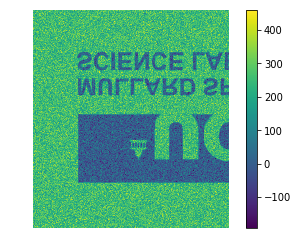

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# YOUR CODE GOES HERE. GOOD LUCK!